In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


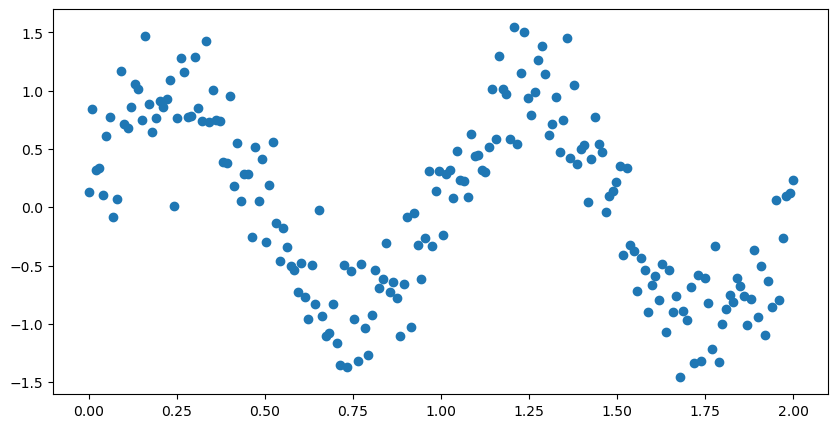

In [53]:
x = np.linspace(0,2,200)
y = np.sin(2*np.pi*x) + np.random.normal(0,0.3,len(x))
plt.figure(figsize=(10,5))
plt.scatter(x,y)

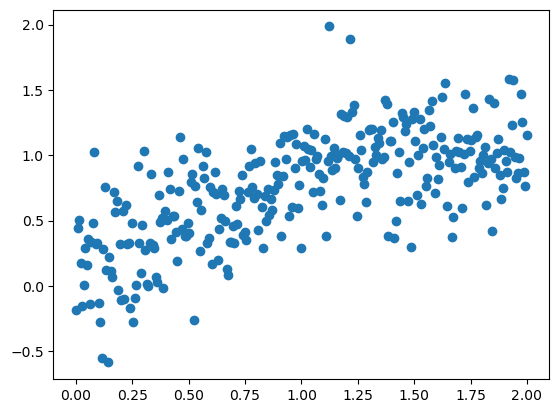

In [55]:
x=np.linspace(0, 2, 300)
#x=x.reshape(-1,1)
#print(x.shape)
y = np.sin(x) + np.random.normal(0, 0.3, len(x))

plt.figure()
plt.scatter(x,y,label='data')